# Statistic Approach

In [7]:
import torch
from matplotlib import pyplot as plt
names = open('../datasets/company_name.txt', 'r').read().splitlines()

In [2]:
# Create a map to store the character
N = torch.zeros((29, 29), dtype=torch.int32)
chars = sorted(list(set(''.join(names))))
stoi = {ch: i for i, ch in enumerate(chars)}

In [3]:
# Complete 
stoi['<S>'] = 27
stoi['<E>'] = 28

In [7]:
for name in names:
    chs = ['<S>'] + list(name) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

In [8]:
# get a reverse stoi
itos = {i: ch for ch, i in stoi.items()}

(-0.5, 28.5, 28.5, -0.5)

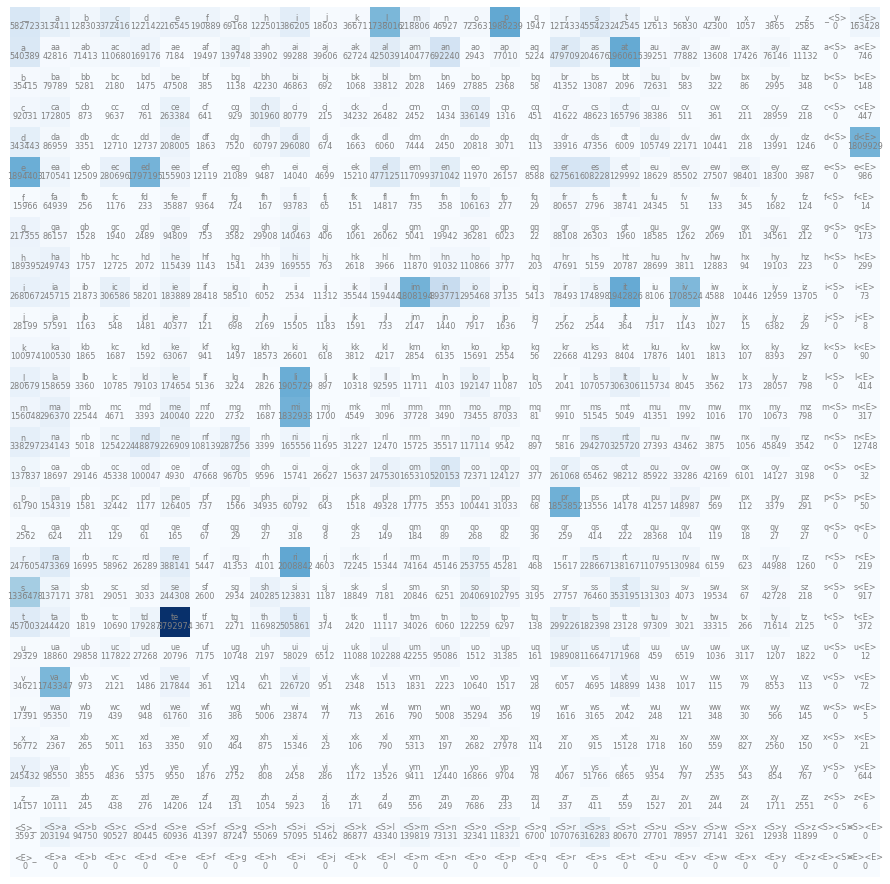

In [9]:
from matplotlib import pyplot as plt
plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')
for i in range(29):
    for j in range(29):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, fontsize=8, ha='center', va='bottom', color='gray')
        plt.text(j, i, N[i, j].item(), fontsize=8,ha='center', va='top', color='gray')
plt.axis('off')

In [35]:
# normalize
P = N.float()
P /= P.sum(1, keepdim=True)

In [28]:
# Train
g = torch.Generator().manual_seed(23217893)
for _ in range(15):
    ix = 0
    out = []
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

prias_
prelis_
ctrm_
b_
linelimpmimivate_
_
pry_
ectecemivinfondutececkashat_
pritececstecate_
pon_
_
arima_
chad_
pri_
patiterchatrte_


In [41]:
# Evaluate
# product has to be pretty high, the higher the better
# log(a * b * c) = log(a) + log(b) + log(c)

log_likelyhood = 0.0
n = 0
for name in names:
    chs = ['<S>'] + list(name) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelyhood += logprob
        n += 1
        # print(f'{ch1} -> {ch2}: {prob:.3f} ({logprob:.3f})')

print(f'Log likelyhood: {log_likelyhood:.3f}')
nnl = -log_likelyhood
print(f'Negative log likelyhood: {nnl:.3f}')
print(nnl / n)

Log likelyhood: -90162992.000
Negative log likelyhood: 90162992.000
tensor(1.2560)


# Neural Network Approach

In [20]:
# Create datset

xs, ys = [], [] # input, output

for name in names[:1]:
    chs = ['<S>'] + list(name) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        # print(f'{ch1} -> {ch2}: {ix1} -> {ix2}')
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [21]:
import torch.nn.functional as F
xs = F.one_hot(xs, num_classes=29).float()
xs.shape

torch.Size([23, 29])

In [44]:
# Define weights and multiply xs and W
g = torch.Generator().manual_seed(23217893)
W = torch.randn((29, 29), generator=g)

# Exponentiating the result
logits = xs @ W # output
# softmax
count = logits.exp()
probs = count / count.sum(1, keepdim=True)
probs

tensor([[0.0320, 0.0037, 0.2469, 0.0183, 0.0133, 0.0565, 0.0223, 0.0122, 0.0062,
         0.0569, 0.1301, 0.0137, 0.0261, 0.0081, 0.0379, 0.0421, 0.0069, 0.0107,
         0.0444, 0.0425, 0.0202, 0.0212, 0.0136, 0.0107, 0.0128, 0.0187, 0.0090,
         0.0441, 0.0188],
        [0.0252, 0.1918, 0.0141, 0.0185, 0.0914, 0.0467, 0.0300, 0.1979, 0.0562,
         0.0111, 0.0511, 0.0108, 0.0197, 0.0078, 0.0020, 0.0069, 0.0080, 0.0028,
         0.0318, 0.0165, 0.0026, 0.0085, 0.0241, 0.0160, 0.0479, 0.0128, 0.0168,
         0.0044, 0.0267],
        [0.0215, 0.0234, 0.0419, 0.1389, 0.0839, 0.0434, 0.0038, 0.0146, 0.0110,
         0.0417, 0.0134, 0.0899, 0.0035, 0.0025, 0.0724, 0.0717, 0.0105, 0.0678,
         0.0375, 0.0146, 0.0120, 0.0562, 0.0104, 0.0321, 0.0246, 0.0328, 0.0039,
         0.0104, 0.0096],
        [0.0620, 0.0048, 0.3863, 0.0075, 0.0236, 0.0020, 0.0557, 0.0097, 0.0450,
         0.0014, 0.0023, 0.0196, 0.0064, 0.0060, 0.0836, 0.0080, 0.0505, 0.0282,
         0.0129, 0.0160, 0.0103